Домашнее задание
Предварительный анализ задачи торговой стратегии

Цель:
В данном домашнем задании вы потренируетесь в процессе сбора данных, их предобработки и отображения.

Описание/Пошаговая инструкция выполнения домашнего задания:
Уважаемый студент!

Вас пригласили на работу в коммерческую компанию, занимающуюся разработкой автоматизированных торговых агентов. Одной из первых ваших задач будет подготовка данных для дальнейшей обработки и построения модели. Пообщавшись с коллегами, вы узнали, что вам предстоит работать с несколькими типами активов: акциями из списка SnP500 и криптовалютами (BTC, ETH, SOL, XRP). Вам планируют поручить краткосрочную и среднесрочную торговлю.

Вам предлагается на основе предоставленной информации:

1. Создать git-репозиторий, где будет храниться исходный код вашего проекта. Если вы используете приватный репозиторий – дайте преподавателям курса доступ к нему, для возможности проверки ДЗ.
2. Добавить файл лицензии, который отражает ваш взгляд на конфиденциальность информации, которую вы подготовите в рамках данного курса.
3. Создать код на Python, который загрузит на ваш локальный компьютер данные о котировках ценных бумаг из списка SnP500 и котировки криптовалют (BTC, ETH, SOL, XRP).
4. Поскольку вам предстоит много работать с ними в дальнейшем, подготовьте автоматическое отображение графиков текущей ситуации.
5. Проверьте нет ли в данных пропусков или ошибок. Проанализируйте выбросы. Оцените, на самом ли деле это выбросы или реальные данные, с которыми предстоит работать.

In [3]:
#Устанавливаем необходимые библиотеки
#pip install yfinance

In [4]:
#Импорт необходимых библиотек
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
#Загружаем список SnP500
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]

#Сохраняем полность таблицу в файл
#df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

#создаем отдельный df только со списком акций из snp500
df_symbols = pd.read_csv("S&P500-Symbols.csv", usecols=["Symbol"])

#дополняем df криптой
df_symbols.loc[len(df_symbols.index)] = ['BTC-USD']
df_symbols.loc[len(df_symbols.index)] = ['ETH-USD']
df_symbols.loc[len(df_symbols.index)] = ['SOL-USD']
df_symbols.loc[len(df_symbols.index)] = ['XRP-USD']

In [6]:
#приабразовываем в список, что бы работал метод split
stockdata = df_symbols['Symbol'].to_list()

#качаем данные за последний год
data = yf.download(stockdata, period='1y',group_by='ticker',keepna='true',interval='1d')

#сохраняем данные в файл
data.to_csv("sp500_data.csv")

[*********************100%***********************]  506 of 506 completed

4 Failed downloads:
['SW']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']")
['AMTM']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']")
['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y)')


In [7]:
crypto_values = 'HPE'
data_one = data[crypto_values]
data_one

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-22,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-24,15.850000,15.915000,15.745000,15.83,15.388723,3788800.0
2023-11-25,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-26,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-27,15.730000,15.780000,15.570000,15.60,15.165134,11202100.0
...,...,...,...,...,...,...
2024-11-20,21.559999,21.559999,21.075001,21.18,21.180000,10338300.0
2024-11-21,21.320000,21.959999,21.299999,21.74,21.740000,12939500.0
2024-11-22,21.809999,22.219999,21.719999,22.10,22.100000,8860400.0


In [8]:
#Проверяем на наличие пропусков, на примере акций HPE, это выходные
data_one.isnull().sum()

Price
Open         116
High         116
Low          116
Close        116
Adj Close    116
Volume       116
dtype: int64

In [9]:
#Смотрим всю статистику
data_one.describe()

Price,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,18.244139,18.480611,18.011956,18.241230,18.041663,1.491466e+07
std,2.023019,2.049873,1.973302,1.995043,2.086803,1.063320e+07
min,14.530000,14.990000,14.465000,14.860000,14.559371,3.788800e+06
25%,16.835000,17.020000,16.697501,16.852500,16.597791,9.353175e+06
50%,17.815000,18.050000,17.642500,17.920000,17.664927,1.150640e+07
75%,20.105000,20.400000,19.867500,20.015000,19.977499,1.617760e+07
max,22.660000,22.820000,21.889999,22.100000,22.100000,8.849210e+07


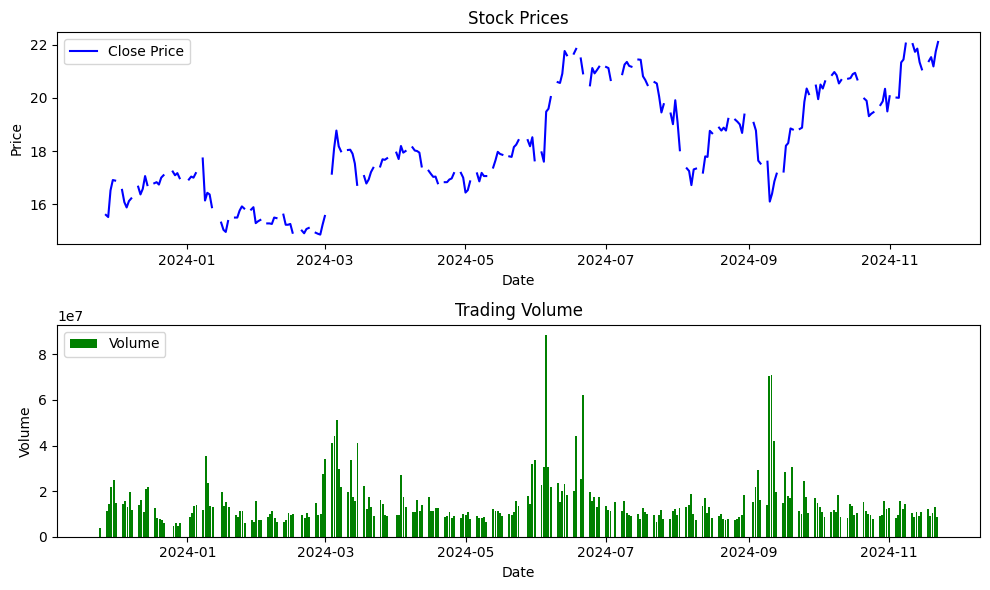

In [10]:
plt.figure(figsize=(10, 6))

# график закрфтия цены
plt.subplot(2, 1, 1)
plt.plot(data_one['Close'], label='Close Price', color='blue')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# график объема
plt.subplot(2, 1, 2)
plt.bar(data_one.index, data_one['Volume'], 
label='Volume', color='green')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

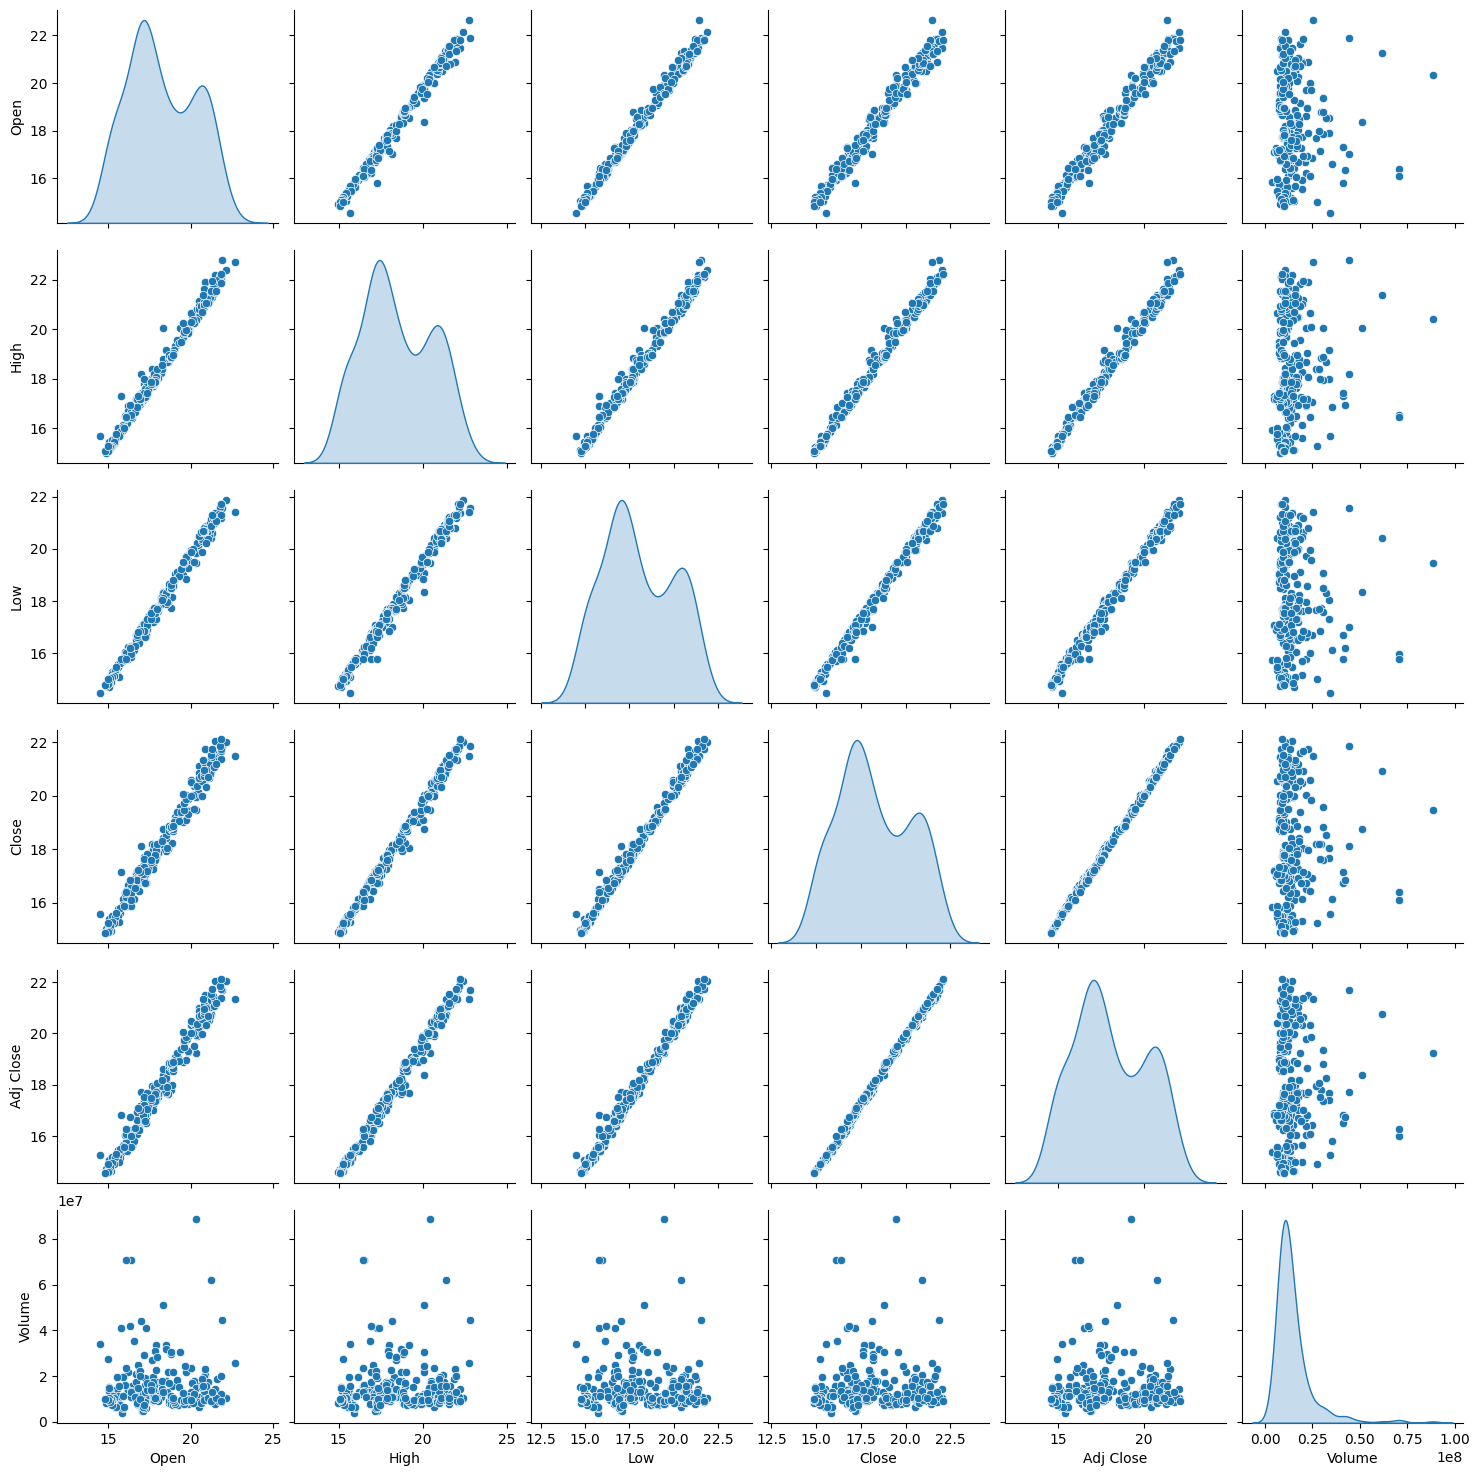

In [11]:
import seaborn
seaborn.pairplot(data_one, diag_kind="kde")

<Axes: xlabel='Price', ylabel='Price'>

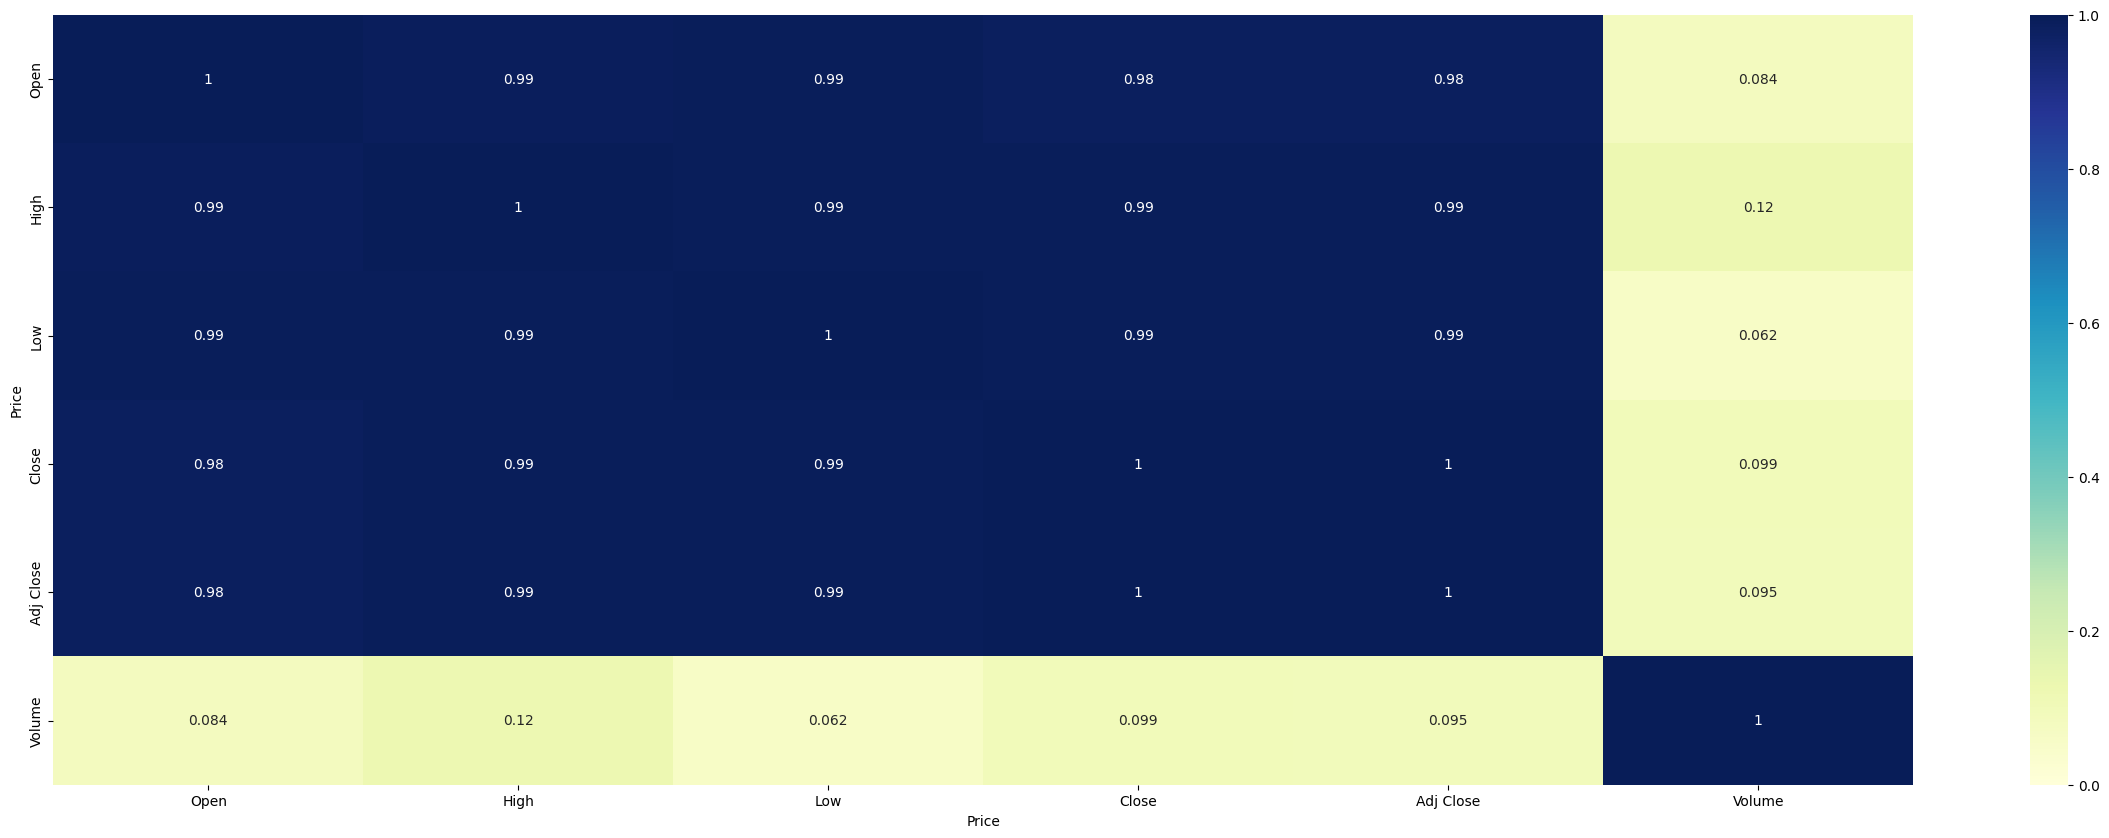

In [12]:
plt.figure(figsize=(30,10))
seaborn.heatmap(data_one.corr(method='spearman', numeric_only=True), vmin=0, vmax=1, cmap='YlGnBu', annot=True)

In [13]:
#Готовое решения для анализа
from ydata_profiling import ProfileReport
report = ProfileReport(data_one)
report.to_file('profile_report.html')

/home/gt/jupiter_venv/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]